<a href="https://colab.research.google.com/github/TharakaSairamNarina/Audio-Augmentation/blob/master/Data_Observation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Unzip the Dataset

In [3]:
!unzip -q 'drive/My Drive/MU456_Classifiers_Final_Data.zip'


In [4]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=46c405dc26ef44fe0c46c4859aec8b249630af9e2db5e8a3691328bd9380d360
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


Imports

In [5]:
from python_speech_features import mfcc,delta,logfbank
import numpy
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import wave
import contextlib
from scipy.fftpack import dct
import scipy.io.wavfile as wav
import os


Path For Each Folder

In [6]:
telugu_train_path = '/content/MU456_Classifiers_Final_Data/Telugu/Telugu_Train/'
bengali_train_path = '/content/MU456_Classifiers_Final_Data/Bengali/Bengali_Train/'
gujarathi_train_path = '/content/MU456_Classifiers_Final_Data/Gujarathi/Gujarathi_Train/'
tamil_train_path = '/content/MU456_Classifiers_Final_Data/Tamil/Tamil_Train/'
assame_train_path = '/content/MU456_Classifiers_Final_Data/Assame/Assame_Train/'
hindi_train_path = '/content/MU456_Classifiers_Final_Data/Hindi/Hindi_Train/'

telugu_test_path = '/content/MU456_Classifiers_Final_Data/Telugu/Telugu_Test/'
bengali_test_path = '/content/MU456_Classifiers_Final_Data/Bengali/Bengali_Test/'
gujarathi_test_path = '/content/MU456_Classifiers_Final_Data/Gujarathi/Gujarathi_Test/'
tamil_test_path = '/content/MU456_Classifiers_Final_Data/Tamil/Tamil_Test/'
assame_test_path = '/content/MU456_Classifiers_Final_Data/Assame/Assame_Test/'
hindi_test_path = '/content/MU456_Classifiers_Final_Data/Hindi/Hindi_Test/'

Data Loader Class

In [7]:
class DataLoader:
  max_length = 0
  min_length = 1000
  def length_audio(self,path):
    sample_rate, signal = scipy.io.wavfile.read(path)
    return len(signal)//sample_rate
  
  def load_files(self,folderpath):
    """
    This function will load all audio files from the given folder path
    """
    return list(map(lambda filename:folderpath+filename,os.listdir(folderpath)))
  
  def calculate_hours(self,files_list):
    seconds = 0
    for pt in files_list:
      leng = self.length_audio(pt)
      if(leng>self.max_length):
        self.max_length = leng
      if(leng<self.min_length):
        self.min_length = leng
      seconds = seconds + leng
    return seconds/3600



Train Data Loader

In [8]:
train_loader = DataLoader()
telugu_train_list = train_loader.load_files(telugu_train_path)
bengali_train_list = train_loader.load_files(bengali_train_path)
gujarathi_train_list = train_loader.load_files(gujarathi_train_path)
tamil_train_list = train_loader.load_files(tamil_train_path)
assame_train_list = train_loader.load_files(assame_train_path)
hindi_train_list = train_loader.load_files(hindi_train_path)

telugu_train_duration = train_loader.calculate_hours(telugu_train_list)
bengali_train_duration = train_loader.calculate_hours(bengali_train_list)
gujarathi_train_duration = train_loader.calculate_hours(gujarathi_train_list)
tamil_train_duration = train_loader.calculate_hours(tamil_train_list)
assame_train_duration = train_loader.calculate_hours(assame_train_list)
hindi_train_duration = train_loader.calculate_hours(hindi_train_list)
train_duration = (telugu_train_duration+bengali_train_duration+gujarathi_train_duration+tamil_train_duration
                  +assame_train_duration+hindi_train_duration)

Analyzing Duration of Train Data

In [9]:
print('Train Data Duration : {0:.2f} Hours'.format(train_duration))
print(" - - - - Duration of each Language - - - -")
print('Telugu: {0:.2f} Hours'.format(telugu_train_duration))
print('Bengali: {0:.2f} Hours'.format(bengali_train_duration))
print('Gujarathi: {0:.2f} Hours'.format(gujarathi_train_duration))
print('Tamil: {0:.2f} Hours'.format(tamil_train_duration))
print('Assame: {0:.2f} Hours'.format(assame_train_duration))
print('Hindi: {0:.2f} Hours'.format(hindi_train_duration))
print("Maximum Audio File:  "+str(train_loader.max_length)+" sec")
print("Minimum Audio File:  "+str(train_loader.min_length)+" sec")

Train Data Duration : 90.23 Hours
 - - - - Duration of each Language - - - -
Telugu: 15.01 Hours
Bengali: 15.06 Hours
Gujarathi: 15.02 Hours
Tamil: 15.01 Hours
Assame: 15.04 Hours
Hindi: 15.09 Hours
Maximum Audio File:  75 sec
Minimum Audio File:  1 sec


Test Data Loader

In [10]:
test_loader = DataLoader()
telugu_test_list = test_loader.load_files(telugu_test_path)
bengali_test_list = test_loader.load_files(bengali_test_path)
gujarathi_test_list = test_loader.load_files(gujarathi_test_path)
tamil_test_list = test_loader.load_files(tamil_test_path)
assame_test_list = test_loader.load_files(assame_test_path)
hindi_test_list = test_loader.load_files(hindi_test_path)

telugu_test_duration = test_loader.calculate_hours(telugu_test_list)
bengali_test_duration = test_loader.calculate_hours(bengali_test_list)
gujarathi_test_duration = test_loader.calculate_hours(gujarathi_test_list)
tamil_test_duration = test_loader.calculate_hours(tamil_test_list)
assame_test_duration = test_loader.calculate_hours(assame_test_list)
hindi_test_duration = test_loader.calculate_hours(hindi_test_list)

test_duration = (telugu_test_duration+bengali_test_duration+gujarathi_test_duration+tamil_test_duration
                +assame_test_duration+hindi_test_duration)

Analyzing Duration of Test Data

In [11]:
print('Test Data Duration : {0:.2f} Hours'.format(test_duration))
print(" - - - - Duration of each Language - - - -")
print('Telugu: {0:.2f} Hours'.format(telugu_test_duration))
print('Bengali: {0:.2f} Hours'.format(bengali_test_duration))
print('Gujarathi: {0:.2f} Hours'.format(gujarathi_test_duration))
print('Tamil: {0:.2f} Hours'.format(tamil_test_duration))
print('Assame: {0:.2f} Hours'.format(assame_test_duration))
print('Hindi: {0:.2f} Hours'.format(hindi_test_duration))
print("Maximum Audio File:  "+str(test_loader.max_length)+" sec")
print("Minimum Audio File:  "+str(test_loader.min_length)+" sec")

Test Data Duration : 17.89 Hours
 - - - - Duration of each Language - - - -
Telugu: 2.84 Hours
Bengali: 3.62 Hours
Gujarathi: 3.02 Hours
Tamil: 3.03 Hours
Assame: 2.17 Hours
Hindi: 3.20 Hours
Maximum Audio File:  46 sec
Minimum Audio File:  1 sec


No.of samples for Each Language

In [12]:

print("Telugu Train : "+str(len(telugu_train_list))+" Test : "+str(len(telugu_test_list)))
print("Bengali Train : "+str(len(bengali_train_list))+" Test : "+str(len(bengali_test_list)))
print("Gujarathi Train : "+str(len(gujarathi_train_list))+" Test : "+str(len(gujarathi_test_list)))
print("Tamil Train : "+str(len(telugu_train_list))+" Test : "+str(len(telugu_test_list)))
print("Assame Train : "+str(len(assame_train_list))+" Test : "+str(len(assame_test_list)))
print("Hindi Train : "+str(len(hindi_train_list))+" Test : "+str(len(hindi_test_list)))

Telugu Train : 7175 Test : 1350
Bengali Train : 9686 Test : 2057
Gujarathi Train : 6295 Test : 1200
Tamil Train : 7175 Test : 1350
Assame Train : 7990 Test : 1940
Hindi Train : 3825 Test : 900


Listening an Audio File

In [13]:
import IPython
IPython.display.Audio(assame_train_list[0])

Analyzing wave form

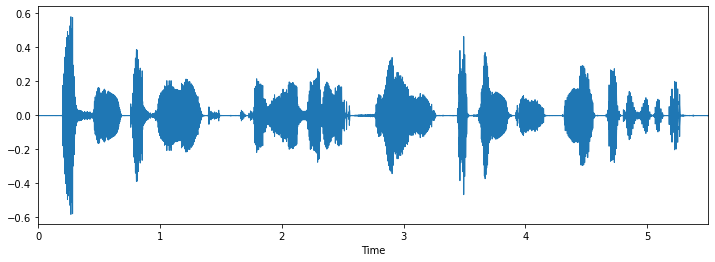

In [14]:
import librosa
import librosa.display
data,sample_rate = librosa.load(assame_train_list[0])
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr=sample_rate)

MelSpectogram

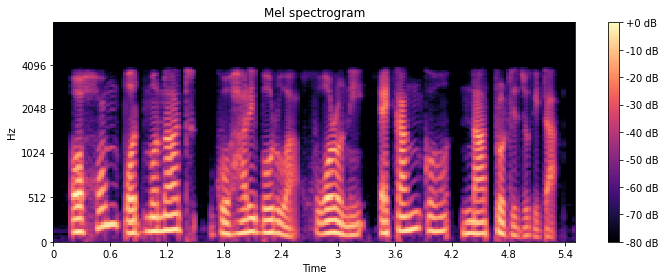

In [15]:

S = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

MFCC 

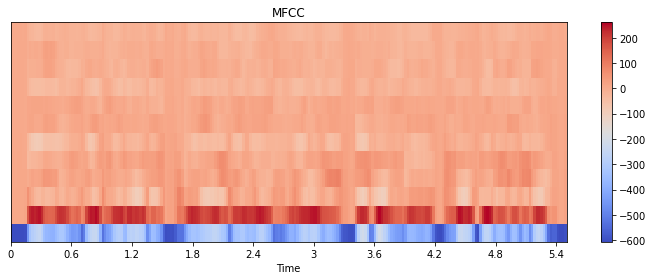

In [16]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=12)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

# ***Observation***

We found that Each Language in Train/Test is of Variable length.